In [1]:
import glob

filename_list = []
for filename in glob.glob('*'):
    if filename.endswith('csv') and filename.startswith('10042019'):
        filename_list.append(filename)

filename_list.sort(reverse=False)
filename_list

['10042019-08 wt MgTFSI PCL-PTMC-3 base.csv',
 '10042019-12 wt MgTFSI PCL-PTMC-3 base.csv',
 '10042019-16 wt MgTFSI PCL-PTMC-2 base.csv',
 '10042019-20 wt MgTFSI PCL-PTMC-2 base.csv',
 '10042019-28 wt MgTFSI PCL-PTMC-3 base.csv',
 '10042019-36 wt MgTFSI PCL-PTMC-2 base.csv']

Directory already exists.
data 1
area 1 = 8.14
wavenumbers (cm^-1) = 753.61
data 2
area 2 = 30.74
wavenumbers (cm^-1) = 748.96
data 3
area 3 = 5.33
wavenumbers (cm^-1) = 744.93
data 4
area 4 = 23.17
wavenumbers (cm^-1) = 741.62
data 5
area 5 = 9.73
wavenumbers (cm^-1) = 737.31
data 6
area 6 = 7.65
wavenumbers (cm^-1) = 733.70
data 7
area 7 = 4.99
wavenumbers (cm^-1) = 729.75
chi square is:  inf
least square error is:  2.5753984942068913
   Wavenumber      Area  Least-square error  Chi-square (10^-6)
0  753.607446  0.090691            2.575398                 inf
1  748.961938  0.342486            2.575398                 inf
2  744.926617  0.059436            2.575398                 inf
3  741.621679  0.258135            2.575398                 inf
4  737.309699  0.108459            2.575398                 inf
5  733.701926  0.085226            2.575398                 inf
6  729.747691  0.055568            2.575398                 inf


<ipython-input-15-cc6b7e69664d>:454: RuntimeWarning: divide by zero encountered in true_divide
  chi_square = np.sum(deviation_sq/np.array(activities))


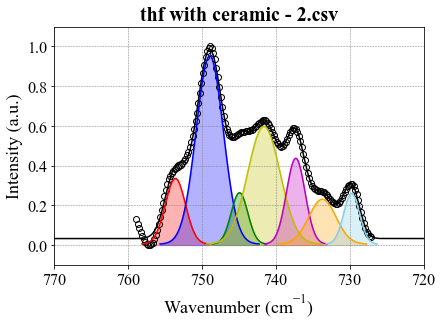

In [15]:
#!/usr/bin/env python3
# -*- coding: utf-8 -*-
#"""
#Created on Mon Feb 19 13:30:52 2018
#
#@author: ClayElmore
#
#Modified on Fri Mar 6 20:09 2020
#Modified by Bumjun Park (bpark4@nd.edu)
#"""

# This program will curve fit a section of a spectrum with a Gaussian 

# --------------------------------------------------------------------------- #
# --------------------------------------------------------------------------- #
# -------------------- This is your section to mess with -------------------- #
# --------------------------------------------------------------------------- #
# --------------------------------------------------------------------------- #

# This is the file name. IT HAS TO BE EXACT.
# Comma should be deleted at the end of the datapoints in the csv file opened in the python environment

file_name = 'thf with ceramic - 2.csv'

# This lets you analyze only the section of a spectra that you want
# 8 MgTFSI2 PCL-PTMC: 728, 58
# 12 MgTFSI2 PCL-PTMC: 728, 65
# 16 MgTFSI2 PCL-PTMC: 729, 58
# 20 MgTFSI2 PCL-PTMC: 727, 67
# 28 MgTFSI2 PCL-PTMC: 729, 62
# 36 MgTFSI2 PCL-PTMC: 729, 63

section_start = 727 # starting wavenumber
points = 160 # number of points analyzed 

# how many peaks do you think there are 
# This has to be less than or equal to your guesses
peak_number = 7

# This makes a directory to save all the figures and parameters, named as the file name (only for the first time run)
save_dir = file_name[:-4] + ' ' + str(peak_number) + ' peaks'

# wavenumber to scale on
scale_peak = 742 # scale peak wavenumber
scale_width = 10 # scale width wavenumber in cm-1
scale_amount = 1

# guesses for where you think the peaks are 
#x_0_guess_1 = [756,752,746,738,734]

# x_0_guess_1 = [752,746,742,740,734] # 8 MgTFSI2 PCL-PTMC 5 peaks
# x_0_guess_1 = [753,746,742,740,734] # 16 MgTFSI2 PCL-PTMC 5 peaks
# x_0_guess_1 = [753,746,742,740,734] # 12 MgTFSI2 PCL-PTMC 5 peaks
# x_0_guess_1 = [752,746,742,740,734] # 20 MgTFSI2 PCL-PTMC 5 peaks
# x_0_guess_1 = [753,747,742,740,738] # 28 MgTFSI2 PCL-PTMC 5 peaks
x_0_guess_1 = [754,748,745,742,737,734,730] # 36 MgTFSI2 PCL-PTMC 5 peaks

# x_0_guess_1 = [752,746,740,734] # 8 MgTFSI2 PCL-PTMC 4 peaks
# x_0_guess_1 = [753,746,740,734] # 12 MgTFSI2 PCL-PTMC 4 peaks
# x_0_guess_1 = [748,743,740,734] # 16 MgTFSI2 PCL-PTMC 4 peaks
# x_0_guess_1 = [752,743,740,734] # 20 MgTFSI2 PCL-PTMC 4 peaks
# x_0_guess_1 = [753,747,742,738] # 28 MgTFSI2 PCL-PTMC 4 peaks
# x_0_guess_1 = [752,746,740,734] # 36 MgTFSI2 PCL-PTMC 4 peaks

# x_0_guess_1 = [752,746,742] # 8 MgTFSI2 PCL-PTMC 3 peaks
# x_0_guess_1 = [752,742,735] # 12 MgTFSI2 PCL-PTMC 3 peaks
# x_0_guess_1 = [752,746,738] # 16 MgTFSI2 PCL-PTMC 3 peaks
# x_0_guess_1 = [752,746,738] # 20 MgTFSI2 PCL-PTMC 3 peaks
# x_0_guess_1 = [752,746,738] # 28 MgTFSI2 PCL-PTMC 3 peaks
# x_0_guess_1 = [750,744,735] # 36 MgTFSI2 PCL-PTMC 3 peaks


#x_0_guess_1 = [756,754,750,744,738] # LiTFSI PCL-PTMC 5 peaks

#x_0_guess_1 = [746,740,735] # MgTFSI2 PEO 3 peaks

# baseline correction
baseline_correction = True

# guess for half peakwidths
lam_guess_1 = [2,2,2,2,2,2,2]

# guess for the height correction
y_guess = 0

# This will give the guesses for the peak intensities. 
# note: I am currently estimating these right now in "Section 4" of the code. 
# if you find that that they are just not working, comment out all of section
# 4 and just place the guesses here. if I find a better way to do section 4 I 
# will let you know
A_guess_1 = lam_guess_1
A_guess_2 = A_guess_1


# bounds for the equtions, these are quite important. GET THEM CLOSE 
bnds=[]
for i in range(peak_number):
    bnds.append((x_0_guess_1[i]-2,x_0_guess_1[i]+2))
    bnds.append((0.1,lam_guess_1[i]+10))
    bnds.append((A_guess_1[i]/50,A_guess_1[i]*100))
bnds.append((0,1))


# name for the final plot
title_name = file_name

# plot axes and legend names
x_axis = 'Wavenumber (cm$\mathregular{^{-1}}$)'
y_axis = 'Intensity (a.u.)'
plot_legend = ['Experimental','Combined Peaks','Peak 1','Peak 2','Peak 3','Peak 4','Peak 5','Peak 6','Peak 7']
scale_legend = ['Pure','SS','TFSI']

# this section controls what you want to plot
full_plot = False # plots the original spectrum 
fit_plot = True # plots the Gaussian fitted curve
close_all = True # clears all previous plots
hold_on = False # plots everything on one for the scaled plots no fitting

# if the algorightm is not converging, try a different one in the list here
# Note: Some of these do not handle the bounds. I recommend mainly sticking 
# to SLSQP and L-BFGS-B but any of them should get you to the same result
choices = ['SLSQP','TNC','Nelder-Mead','Powell','CG','BFGS','L-BFGS-B','COBYLA']
algorithm = choices[0]

# if the algorithm needs more iternations you can increase it here
iterations = 1500

# Wavelet noise reduction:
wavelet_correction = False
wavelet_plot = False
wavelet_compare = True
epsilon = 0.01
level_trans = 5

calc_li = False

# DO NOT TOUCH THE REST OF THIS. PLEASE. I DON'T WANT TO MESS WITH THIS AGAIN.
# --------------------------------------------------------------------------- #
import math
import os
import csv
import pandas as pd
from matplotlib import pyplot as plt
pi = math.pi
e = math.e
import numpy as np
from scipy.optimize import minimize
from pywt import wavedec as dwt
from pywt import waverec as dwt_inv

# --------------------------------------------------------------------------- #
# Section 1: Define the functions that will govern the curves

# Gaussian distribution for just one curve
def gaus_dist(x,x_01,lam1,A1,y):
    return (y+A1*(1/lam1/np.sqrt(2*pi)*np.exp(-(x-x_01)**2/2/(lam1**2))))

def gaus_dist_mult(x,x_01,lam1,A1,y):
    ans = 0
    for i in range(len(lam1)):
        ans += y+(A1[i]*(1/lam1[i]/np.sqrt(2*pi)*np.exp(-(x-x_01[i])**2/2/(lam1[i]**2)))) 
    return (ans)    

# --------------------------------------------------------------------------- #
# Section 2: Import the data 

def get_data(file_name):
    # initialize the arrays for the data
    wavenumbers = []
    activities = []
    
    # open the csv file
    with open(file_name) as csvfile:
        readCSV = csv.reader(csvfile, delimiter=',')
        
        # These variables will allow you to only include the data
        row_count = 0;
        end = 0
        for row in readCSV:
            if row == []:
                end=1
            elif row_count > 18 and not end:
                activities.append(float(row[1]))
                wavenumbers.append(float(row[0]))
            row_count+=1
        return (wavenumbers,activities)            

# run the above function
wavenumbers,activities = get_data(file_name)
wavenumbers_old = wavenumbers
activities_old = activities

# try to shift to baseline correct
if baseline_correction == True:
    idx = 0
    min = 1000
    activities_shift = []
    for i in range(len(activities)):
        if math.floor(wavenumbers[i]) == section_start:
            idx = i
            for j in range(i, i+points):
                if min > activities[j]:
                    min = activities[j]
    for k in range(len(activities)):
        if min > 0:
            activities_shift.append(activities[k] - min)
    activities = activities_shift

# scale the data
def scale(activities,wavenumbers):
    wave_mod = []
    for i in range(len(wavenumbers)):
        wave_mod.append(math.floor(wavenumbers[i]))
        
    scale_index = wave_mod.index(scale_peak)
    scale_min = wave_mod.index(scale_peak - scale_width)
    scale_max = wave_mod.index(scale_peak + scale_width)
    scale_act = max(activities[scale_min:scale_max])
    for i in range(len(activities)):
        activities[i] = activities[i]/scale_act
    
    return(activities)
        
activities = scale(activities,wavenumbers)
activities_old_scale = activities

# user controlled plots
if close_all:
    plt.close('all')
    
if wavelet_correction:
    activities_old = activities

    activities = np.array(activities)
    coeff = dwt(activities,'db4',level = level_trans)
    # make the wavelet:
    x_wavelet = []
    for i in coeff:
        for j in i:
            x_wavelet.append(j)
    
    # --------------------------------------------------------------------------- #
    # --------------------------------------------------------------------------- #
    # Noise Reduction
            
    def reduce_noise (decomp,epsilon):
        for i in range(len(decomp)):
            if i>0:
                for j in range(len(decomp[i])):
                    if abs(decomp[i][j]) < epsilon:
                        decomp[i][j] = 0
        return(decomp)
    
    coeff = reduce_noise(coeff,epsilon)
    
    # make the new vector
    activities = dwt_inv(coeff,'db4')
    
    # show the new wavelet vector
    x_wavelet_reduc = []
    for i in coeff:
        for j in i:
            x_wavelet_reduc.append(j)
            
    activities=activities[:-1]
    
    # --------------------------------------------------------------------------- #
    # --------------------------------------------------------------------------- #
    # Plotting
    
    activities = scale(activities,wavenumbers)
    
    if wavelet_plot:
        plt.figure()
        plt.plot(x_wavelet)
        plt.plot(x_wavelet_reduc,'--')
        plt.title('Wavelets')
        plt.legend(['Level '+str(level_trans)+' Decomposition',\
                    'Level '+str(level_trans)+' Decomposition W/ Noise Reduction'])
    
    if wavelet_compare:
        plt.figure()
        plt.plot(wavenumbers,activities_old)
        plt.plot(wavenumbers,activities)
        plt.legend(['Original','Reduced Noise'])
        plt.title('Wavelet Noise Reduction')

if full_plot and not hold_on:
    plt.plot(wavenumbers,activities,'k')
    plt.title(title_name)
    plt.xlabel('Wavenumber')
    plt.ylabel('Activities (A.U.)')
    
if full_plot and hold_on:
    plt.plot(wavenumbers,activities)
    plt.title(title_name)
    plt.xlabel('Wavenumber')
    plt.ylabel('Activities (A.U.)')
    plt.legend(scale_legend)
    
# --------------------------------------------------------------------------- #
# Section 3: Slice AND baseline correct the data to whatever section you want 

def section(wavenumbers,activities,section_start,points): 
    
    # find the index of the place that the section starts
    wave_mod = []
    for i in range(len(wavenumbers)):
        wave_mod.append(math.floor(wavenumbers[i]))
        
    low_index = wave_mod.index(section_start)
    
    wavenumbers_mod = wavenumbers[low_index : low_index+points]
    activities_mod = activities[low_index : low_index+points]
    
    # below corrects the background by subtracting all points by minimum within sliced data
    activities_mod_array = np.array(activities_mod)
    activities_mod_shift_array = activities_mod_array
    if activities_mod_array.min() > 0:
        activities_mod_shift_array = activities_mod_array - activities_mod_array.min()
    activities_mod = list(activities_mod_shift_array)
    
    return (wavenumbers_mod,activities_mod)


    
# run the function
wavenumbers,activities = section(wavenumbers,activities,section_start,points)
# --------------------------------------------------------------------------- #
# Section 5: This section will curve fit the given section to a given number
#            of curves for however many peaks there are suspected to be

# make the x and y arrays out of the spectrum's defined section
x = np.array(wavenumbers)
y = np.array(activities)

# create the guess array as a numpy array
guess = []
for i in range(peak_number):
    guess.append(x_0_guess_1[i])
    guess.append(lam_guess_1[i])
    guess.append(A_guess_1[i])
guess.append(y_guess)
guess = np.array(guess)

# define the two norm of the Gaussian function:
def gaus_cauchy_dist_mult_two_norm(var,y,x):
    y_new=[]
    for j in range(len(y)):
        ans = 0
        for i in range(peak_number):
            ans += var[-1]+(var[i*3+2]*(1/var[i*3+1]/np.sqrt(2*pi)\
                    *np.exp(-(x-var[i*3])**2/2/(var[i*3+1]**2)))) 
        y_new.append(ans)
    
    y_new = np.array(y_new)
    res = np.linalg.norm(y-y_new)
    return (res)

# use the sciPy optimize function to fit the curve
bnds = tuple(bnds)
params = minimize(gaus_cauchy_dist_mult_two_norm, guess, args=(y, x),\
                  method=algorithm,bounds=bnds,options={'maxiter':iterations})


square_error = params.fun

params =  params.x

# store the parameters
x_01 = []
lam1 = []
A1 = []
x_02 = []
lam2 = []
A2 = []
for i in range(peak_number):
    x_01.append(params[3*i])
    lam1.append(params[3*i+1])
    A1.append(params[3*i+2])
y_0 = (params[-1])
# --------------------------------------------------------------------------- #

# Section 7: Plotting

try:
    os.mkdir(save_dir)
except FileExistsError:
    print('Directory already exists.')
    
# set default font style and size globally in matplotlib
plt.rcParams['font.family'] = 'Times New Roman'
plt.rcParams['font.size'] = 15
plt.rcParams['figure.figsize'] = 6.4, 4.8

expand_background = 20
cutoff_act_value = 0.001 # cutoff value for each peak (plot and area)
raw_sliced_range = True # False if need to plot all range of raw data

# plot the theoretical curve
colors = ['r','b','g','y','m','orange','skyblue']  # color list
if fit_plot:
    # plot the sliced data
    plt.figure()
    if raw_sliced_range == True:
        plt.plot(wavenumbers,activities, linestyle='none', marker='o', markerfacecolor='none', markeredgecolor='k')
    else:
        plt.plot(wavenumbers_old,activities_old_scale, linestyle='none', marker='o', markerfacecolor='none', markeredgecolor='k')
    wave_est_new = np.linspace(section_start-expand_background,wavenumbers[-1]+expand_background,500)
    act_est = []
    for i in wave_est_new:
        act_est.append(gaus_dist_mult(i,x_01,lam1,A1,y_0))
    plt.plot(wave_est_new,act_est,'k-')
    sliced_data = {'Wavenumbers (cm^-1)': wave_est_new, 'Intensity (a.u.) fit': act_est}
    dataframe = pd.DataFrame(sliced_data)
    dataframe.to_csv(save_dir+"/"+file_name[:-4] + " sliced_fit.csv",index=False) # File name of total fitting curve
    fitted_activities = []
    for i in wavenumbers:
        fitted_activities.append(gaus_dist_mult(i, x_01, lam1, A1, y_0))
    sliced_raw_chi = pd.DataFrame({'Wavenumbers (cm^-1)': wavenumbers, 'Intensity (a.u.) data': activities, 'Intensity (a.u.) fit': fitted_activities})
    sliced_raw_chi.to_csv(save_dir+"/"+file_name[:-4] + " sliced_raw.csv",index=False)
    
    # plot the individual peaks and save each peak point
    area_list = []
    wavenumber_list = []
    for i, color in zip(range(peak_number), colors):
        act_est1 = []
        wave_est_peak = []
        for j in range(len(wave_est_new)):
            if abs(gaus_dist(wave_est_new[j],x_01[i],lam1[i],A1[i],y_0) - gaus_dist(wave_est_new[0],x_01[i],lam1[i],A1[i],y_0)) > cutoff_act_value:
                act_est1.append(gaus_dist(wave_est_new[j],x_01[i],lam1[i],A1[i],y_0))
                wave_est_peak.append(wave_est_new[j])
                
        act_est1_array = np.array(act_est1)
        plt.plot(wave_est_peak,act_est1,color=colors[i])
        plt.fill_between(wave_est_peak,act_est1, where=act_est1_array>=cutoff_act_value, interpolate=True,color=colors[i], alpha=0.3)
        print("data {0}".format(i+1))
        print("area {0} = %0.2f".format(i+1) % np.trapz(act_est1))
        print("wavenumbers (cm^-1) = %0.2f" % (x_01[i]))
        area_list.append(np.trapz(act_est1))
        wavenumber_list.append((x_01[i]))
        peaks = {'Wavenumber (cm-1)': wave_est_peak, 'Intensity (a.u.)': act_est1}
        dataframe = pd.DataFrame(peaks)
        dataframe.to_csv(save_dir+"/"+file_name[:-4]+ " peak {0}.csv".format(i+1),index=False) # File name of each fitting curve
    
    # save parameters
    area_sum = 0
    for j in range(len(area_list)):
        area_sum += area_list[j]
    area_list = area_list/area_sum
    
    # chi square
    deviation_sq = (np.array(fitted_activities)-np.array(activities))**2
    chi_square = np.sum(deviation_sq/np.array(activities))
    
    # previous chi square calculation was this
    #deviation = np.array(fitted_activities)-np.array(activities)
    #std = np.std(deviation)
    #chi_square = np.sum(deviation/std)**2
    print('chi square is: ', chi_square)
    print('least square error is: ', square_error)
    
    # save fitting information
    peaks_info = pd.DataFrame({'Wavenumber': wavenumber_list,'Area': area_list, 'Least-square error': square_error, 'Chi-square (10^-6)': chi_square*1000000})
    peaks_info.to_csv(save_dir+"/"+file_name[:-4]+" peak infos.csv", index=False)
    print(peaks_info)
    
    plt.title(title_name,**{'size':'20','weight':'bold','fontname':'Times New Roman'})
    plt.xlabel(x_axis,**{'size':'18','fontname':'Times New Roman'})
    plt.ylabel(y_axis,**{'size':'18','fontname':'Times New Roman'})
    plt.xlim(770,720) # peak scale
    plt.ylim(-0.1, 1.1)
    plt.xticks(fontsize=16, fontname='Times New Roman')
    plt.yticks(fontsize=16, fontname='Times New Roman')
    plt.grid(b=None, which='major', axis='both', color='grey', linestyle='--', linewidth=0.5)
    plt.legend(plot_legend,bbox_to_anchor=(1, 0, .5, 1)).set_in_layout(False)
    plt.tight_layout()

plt.savefig(save_dir+'/'+file_name[:-4]+'.png',dpi=300)
plt.show()

# --------------------------------------------------------------------------- #

In [232]:
# not sure what it is

#def est_li(A_free,A_tethered):

def error_analysis (activities_old,activities,wavenumbers,A1,x_01,lam1,y):
#    # first find residuals:
#    fit_act = []
#    for i in wavenumbers:
#        fit_act.append(gaus_dist_mult(i,x_01,lam1,A1,y_0))
#    fit_act = np.array(fit_act)
#    activities = np.array(activities)
#    residuals = abs(activities - fit_act)
#    
#    # find the std and mean of the residuals 
#    residual_mean = np.mean(residuals)

    # take a section of spectrum that has no peaks and find a residual using this 
    noise_points = activities_old[len(activities_old)-100:len(activities_old)]
    noise_mean = np.mean(noise_points)
    residual = abs(noise_points - noise_mean)
    residual_mean = np.average(residual)
    print('Residual mean:',residual_mean)
    
    # monte carlo simulation:    
    # these are the vectors that hold all of the results
    num_trial = 1000
    A_test_tethered = []
    x0_test_tethered =[]
    lam_test_tethered = []
    A_test_free = []
    x0_test_free =[]
    lam_test_free = []
    y_test= []
    
    # this simulates all the data
    for i in range(num_trial):
        
        # create the random data
        act_mont = gaus_dist_mult(wavenumbers,x_01,lam1,A1,y)
        for j in range(len(act_mont)):
            act_mont[j] = act_mont[j] + residual_mean*np.random.normal()    
        
        # fit the simulated data
        coeffs = minimize(gaus_cauchy_dist_mult_two_norm, guess, args=(act_mont, wavenumbers),\
                  method=algorithm,bounds=bnds,options={'maxiter':iterations})
        coeffs =  coeffs.x
        
        # this stores the coefficients
#        x0_test_tethered.append(coeffs)
#        lam_test_tethered.append(coeffs[1])
        A_test_tethered.append(coeffs[2])            
#        x0_test_free.append(coeffs[3])
#        lam_test_free.append(coeffs[4])
        A_test_free.append(coeffs[5])
#        y_test.append(coeffs[-1])
    
    
    # calcualte the theoretical ion percentages for each of the tests
    cation_sim = []
    for i in range(len( A_test_free)):
        cation_sim.append(A_test_free[i] / (A_test_free[i]+A_test_tethered[i]))
    cation_error= np.std(cation_sim)*2
    free_cation_sim = np.mean(cation_sim)
    
    # calculate free ion percentage
    free_cation = A1[1] / (A1[1]+A1[0])
    
    return free_cation, free_cation_sim, cation_error

if calc_li:   
    free_cation, free_cation_sim, cation_error = \
        error_analysis (activities_old, activities,wavenumbers,A1,x_01,lam1,y_0)
    
    print('Experimental percent of free Li: '+str(free_cation*100))
    print('Simulation percent of free Li: '+str(free_cation_sim*100)\
          +' Plus or Minus '+str(cation_error*100))
    print('Percent Error: '+str(cation_error/free_cation*100))

if not calc_li:
    print('Free cation: ',(A1[1] / (A1[1]+A1[0]))*100)


Free cation:  84.02621497644162
